In [54]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [55]:
wine_data = np.genfromtxt('winequality-red.csv', delimiter=';')

wine_data = np.delete(wine_data, 0, 0)
alcohol = np.array(wine_data[:,10])
quality = np.array(wine_data[:,11])

print(alcohol)
print(quality)

[ 9.4  9.8  9.8 ... 11.  10.2 11. ]
[5. 5. 5. ... 6. 5. 6.]


In [76]:
# y = ax + b;
# y -> quality, x -> alcohol
opt = qml.GradientDescentOptimizer(0.01)

init_weights = [0.3, 1.0]
weights = init_weights

#predict quality value
def quality_prediction(weights):
    return weights[0] * alcohol + weights[1]

#calculate cost function
def cost(weights):
    quality_predicted = quality_prediction(weights)
    rmse = np.sqrt(np.mean((quality - quality_predicted) ** 2))
    return rmse

for step in range(60):
    weights = opt.step(cost, weights)
    print(cost(weights))  

0.8768870870146714
0.7276455779659249
0.7186859142061713
0.7162904160646951
0.7155917725773034
0.7153825138448905
0.7153186645762356
0.7152983993420051
0.715291232082247
0.7152880043893537
0.715285962130652
0.7152842768154662
0.7152826991935272
0.7152811542751998
0.7152796194985239
0.7152780880751771
0.7152765579626402
0.7152750285462796
0.71527349964108
0.7152719711912897
0.7152704431800504
0.7152689156022062
0.7152673884561228
0.7152658617412252
0.7152643354572573
0.715262809604059
0.715261284181499
0.7152597591894548
0.7152582346278067
0.7152567104964355
0.7152551867952222
0.7152536635240485
0.7152521406827954
0.7152506182713446
0.7152490962895774
0.7152475747373754
0.7152460536146199
0.7152445329211925
0.7152430126569749
0.7152414928218486
0.715239973415695
0.7152384544383962
0.7152369358898334
0.7152354177698887
0.7152339000784437
0.7152323828153803
0.71523086598058
0.715229349573925
0.715227833595297
0.7152263180445778
0.7152248029216496
0.7152232882263941
0.7152217739586936
0.71

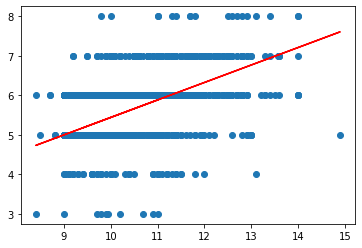

In [77]:
plt.scatter(alcohol, quality)
plt.plot(alcohol, quality_prediction(weights), 'r')